In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.layers import Dropout, BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import seaborn as sns

In [2]:
train_df = pd.read_csv("../Data/UNSW_NB15_testing-set.csv")
test_df = pd.read_csv("../Data/UNSW_NB15_training-set.csv")

In [3]:
train_df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [4]:
test_df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [5]:
train_df.describe(include='all')

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
count,175341.000000,175341.000000,175341,175341,175341,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341,175341.000000
unique,NaN,NaN,133,13,9,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
top,NaN,NaN,tcp,-,INT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN
freq,NaN,NaN,79946,94168,82275,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56000,NaN
mean,87671.000000,1.359389,NaN,NaN,NaN,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,...,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,NaN,0.680622
std,50616.731112,6.480249,NaN,NaN,NaN,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,...,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,NaN,0.466237
min,1.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,0.000000
25%,43836.000000,0.000008,NaN,NaN,NaN,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,...,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,NaN,0.000000
50%,87671.000000,0.001582,NaN,NaN,NaN,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,...,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,NaN,1.000000
75%,131506.000000,0.668069,NaN,NaN,NaN,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,...,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,NaN,1.000000


In [6]:
def preprocess_numerical_cols(df):
    numerical_cols = df.select_dtypes(exclude=["object"]).columns
    df[numerical_cols] = df[numerical_cols].fillna(0)
    return df

In [7]:
def preprocess_categorical_cols(df):
    categorical_cols = df.select_dtypes(include=["object"]).columns
    df[categorical_cols] = df[categorical_cols].replace('-', "None")
    df[categorical_cols] = df[categorical_cols].fillna("None")
    return df

In [8]:
def drop_columns(df, to_drop = ['id','attack_cat']):
    df.drop(to_drop,axis=1,inplace=True)
    return df

In [9]:
def plot_labels(df):
    plt.figure(figsize=(10,5))
    sns.countplot(x='label',data=df)
    plt.show()

In [10]:
def perform_Smote_over_sampling(X,y):
    from imblearn.over_sampling import SMOTE
    smote = SMOTE()
    X_smote, y_smote = smote.fit_resample(X, y)
    return X_smote, y_smote

In [11]:
def standardize(df):
    scaler = StandardScaler()
    df = scaler.fit_transform(df)
    return df

In [12]:
train_df = drop_columns(train_df)
test_df = drop_columns(test_df)

In [13]:
train_df = preprocess_numerical_cols(train_df)
test_df = preprocess_numerical_cols(test_df)
train_df = preprocess_categorical_cols(train_df)
test_df = preprocess_categorical_cols(test_df)

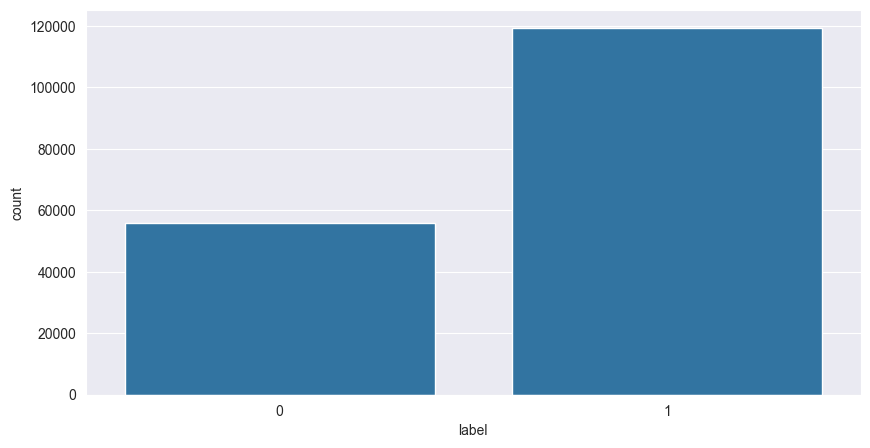

In [14]:
plot_labels(train_df)

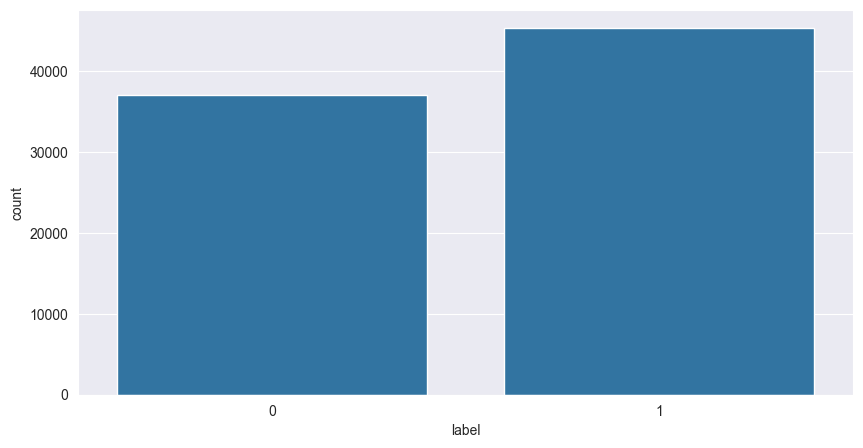

In [15]:
plot_labels(test_df)

In [16]:
target_variable = 'label'
X_train = train_df.drop(target_variable, axis=1)
y_train = train_df[target_variable]
X_test = test_df.drop(target_variable, axis=1)
y_test = test_df[target_variable]

In [17]:
# Identify the categorical columns in your dataset
categorical_columns = X_train.select_dtypes(include=['object']).columns

In [18]:
# Apply one-hot encoding to the categorical columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[categorical_columns])

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [19]:
X_test_encoded = encoder.transform(X_test[categorical_columns])

In [20]:
# Combine the one-hot encoded features with the numerical features
X_train_numeric = X_train.drop(categorical_columns, axis=1)
X_train_combined = np.hstack((X_train_numeric, X_train_encoded))

In [21]:
X_test_numeric = X_test.drop(categorical_columns, axis=1)
X_test_combined = np.hstack((X_test_numeric, X_test_encoded))

In [22]:
# Perform SMOTE over-sampling on the training data
X_train_resampled, y_train_resampled = perform_Smote_over_sampling(X_train_combined, y_train)

In [23]:
# number of missing values
print("Number of missing values in training set: ", np.count_nonzero(np.isnan(X_train_resampled)))

Number of missing values in training set:  0


In [24]:
# Standardize the dataset
X_train_standardized = standardize(X_train_resampled)
X_test_standardized = standardize(X_test_combined)

In [25]:
from collections import Counter
# Check the class distribution after oversampling
class_counts_resampled = Counter(y_train_resampled)
print("Class Distribution after SMOTE Oversampling:")
print(class_counts_resampled)

Class Distribution after SMOTE Oversampling:
Counter({0: 119341, 1: 119341})


In [26]:
# Shapes of training set, test set, and standardized sets
print("Shape of X_train_standardized: ", X_train_standardized.shape)
print("Shape of X_test_standardized: ", X_test_standardized.shape)

Shape of X_train_standardized:  (238682, 194)
Shape of X_test_standardized:  (82332, 194)


In [27]:
from keras.layers import GRU
def create_GRU_model(input_shape,dropout_rate=0.2,activation='relu'):
    model = Sequential()
    model.add(GRU(64, input_shape=input_shape, activation=activation, return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(GRU(64, activation=activation))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation=activation))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation=activation))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [41]:
input_shape = (X_train_standardized.shape[1],)
from sklearn.model_selection import ParameterSampler
def tune_hyperparams():
    input_shape = (X_train_standardized.shape[1],1)
    # use random serch to tune hyperparameters
    params_grid = {
        'batch_size': [32, 64, 128],
        'epochs': [10, 20, 30],
        'learning_rate': [0.0001, 0.001, 0.01],
        'dropout_rate': [0.2, 0.25, 0.3],
        'activation': ['relu', 'leaky_relu', 'tan_h'],
        'optimizer': ['adam', 'sgd', 'rmsprop']
    }
    params_list = list(ParameterSampler(params_grid, n_iter=10, random_state=42))
    best_params = None
    for params in params_list:
        print("Trying Out : ",params)
        model = create_GRU_model(input_shape, params['dropout_rate'], params['activation'])
        if params['optimizer'] == 'adam':
            optimizer = tf.keras.optimizers.Adam(learning_rate=params['learning_rate'])
        elif params['optimizer'] == 'sgd':
            optimizer = tf.keras.optimizers.SGD(learning_rate=params['learning_rate'])
        else:
            optimizer = tf.keras.optimizers.RMSprop(learning_rate=params['learning_rate'])
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
        early_stopping = EarlyStopping(patience=10, verbose=1, restore_best_weights=True, monitor='val_loss')
        reduce_lr = ReduceLROnPlateau(patience=3, verbose=1, monitor='val_loss', factor=0.25, min_lr=0.000005)
        history = model.fit(X_train_standardized, y_train_resampled, epochs=params['epochs'],
                            batch_size=params['batch_size'], validation_split=0.2, callbacks=[early_stopping, reduce_lr])
        y_pred = model.predict(X_test_standardized)
        y_pred = (y_pred > 0.5)
        if best_params is None:
            best_params = params
            best_model = model
            best_history = history
            best_y_pred = y_pred
        else:
            if accuracy_score(y_test, y_pred) > accuracy_score(y_test, best_y_pred):
                best_params = params
                best_model = model
                best_history = history
                best_y_pred = y_pred
    return best_params, best_model, best_history, best_y_pred

In [42]:
best_params, best_model, best_history, best_y_pred = tune_hyperparams()

Trying Out :  {'optimizer': 'adam', 'learning_rate': 0.0001, 'epochs': 20, 'dropout_rate': 0.3, 'batch_size': 128, 'activation': 'leaky_relu'}
Epoch 1/20


Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x000001DEAAB70DC0>
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\weakref.py", line 368, in remove
    self = selfref()
KeyboardInterrupt: 


  15/1492 [..............................] - ETA: 4:32 - loss: 0.9176 - accuracy: 0.5307


KeyboardInterrupt



In [28]:
input_shape = (X_train_standardized.shape[1],1)
model = create_GRU_model(input_shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 194, 64)           12864     
                                                                 
 batch_normalization (Batch  (None, 194, 64)           256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 194, 64)           0         
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [29]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
# Use early stopping and reduce learning rate on plateau
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(patience=5, verbose=1, restore_best_weights=True, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(patience=3, verbose=1, monitor='val_loss', factor=0.2)

In [31]:
# Train the model
history = model.fit(X_train_standardized, y_train_resampled, epochs=20,
                    batch_size=64, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/20
2984/2984 [==============================] - 310s 103ms/step - loss: 0.5589 - accuracy: 0.7133 - val_loss: 0.6995 - val_accuracy: 0.8598 - lr: 1.0000e-04
Epoch 2/20
2984/2984 [==============================] - 312s 104ms/step - loss: 0.5008 - accuracy: 0.7354 - val_loss: 0.7153 - val_accuracy: 0.6895 - lr: 1.0000e-04
Epoch 3/20
2984/2984 [==============================] - 308s 103ms/step - loss: 0.4664 - accuracy: 0.7588 - val_loss: 0.5884 - val_accuracy: 0.6682 - lr: 1.0000e-04
Epoch 4/20
2984/2984 [==============================] - 281s 94ms/step - loss: 0.3305 - accuracy: 0.8403 - val_loss: 0.1463 - val_accuracy: 0.9335 - lr: 1.0000e-04
Epoch 5/20
2984/2984 [==============================] - 281s 94ms/step - loss: 0.1906 - accuracy: 0.9172 - val_loss: 0.2019 - val_accuracy: 0.8539 - lr: 1.0000e-04
Epoch 6/20
2984/2984 [==============================] - 281s 94ms/step - loss: 0.1731 - accuracy: 0.9210 - val_loss: 0.1886 - val_accuracy: 0.8643 - lr: 1.0000e-04
Epoch 7/20
29

In [32]:
# Evaluate on test set for precision, recall, f1-score, and accuracy
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
y_pred = model.predict(X_test_standardized)
y_pred = (y_pred > 0.5)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

2573/2573 [==============================] - 56s 22ms/step
Accuracy:  0.8789656512656076
Precision:  0.870342834404909
Recall:  0.9167475513985706
F1 Score:  0.8929427058153652
              precision    recall  f1-score   support

           0       0.89      0.83      0.86     37000
           1       0.87      0.92      0.89     45332

    accuracy                           0.88     82332
   macro avg       0.88      0.87      0.88     82332
weighted avg       0.88      0.88      0.88     82332


In [33]:
#confusion matrix
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,5))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

2573/2573 [==============================] - 57s 22ms/step


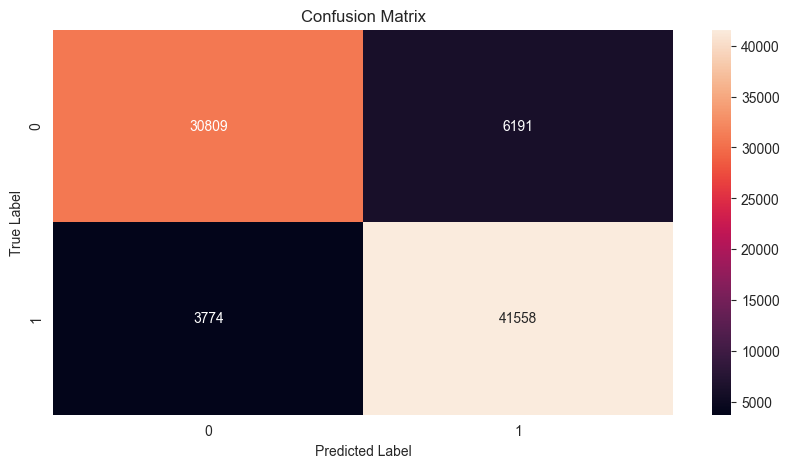

In [34]:
plot_confusion_matrix(model, X_test_standardized, y_test)

In [35]:
def visualize_training_results(history):
    plt.figure(figsize=(10,5))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Training Results')
    plt.show()

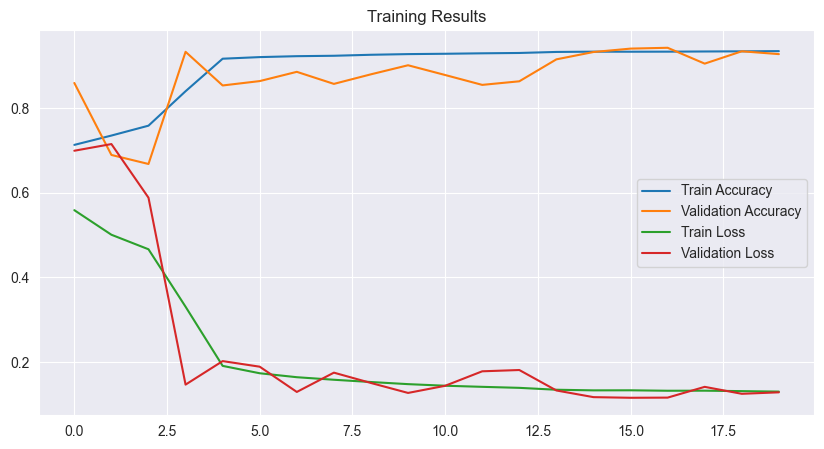

In [36]:
visualize_training_results(history)

In [37]:
# Save the model
model.save('GRU_bin_model.h5')

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
